In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/2024_geocoded_encoded_1023_elevator.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28195 entries, 0 to 28194
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   鄉鎮市區                  28195 non-null  object 
 1   交易標的                  28195 non-null  object 
 2   土地位置建物門牌              28195 non-null  object 
 3   土地移轉總面積平方公尺           28195 non-null  float64
 4   都市土地使用分區              28195 non-null  object 
 5   非都市土地使用分區             3080 non-null   object 
 6   非都市土地使用編定             3079 non-null   object 
 7   交易年月日                 28195 non-null  object 
 8   交易筆棟數                 28195 non-null  object 
 9   移轉層次                  28195 non-null  object 
 10  總樓層數                  28194 non-null  object 
 11  建物型態                  28195 non-null  object 
 12  主要用途                  28182 non-null  object 
 13  主要建材                  28194 non-null  object 
 14  建築完成年月                19440 non-null  float64
 15  建物移轉總面積平方公尺        

In [3]:
df.columns

Index(['鄉鎮市區', '交易標的', '土地位置建物門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元',
       '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯', '移轉編號', '建案名稱', '棟及號',
       '解約情形', '緯度', '經度', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間',
       '是否包含車位', '建築型態清整', '陽台有無', '是否含額外土地', 'good_count', 'bad_count',
       'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
       'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '都市土地使用分區_清整', '住', '其他', '商', '工', '農',
       '建築完成年', '屋齡', '有無電梯', '移轉層次_數字', '移轉層次_騎樓', '移轉層次_屋頂', '移轉層次_一二樓',
       '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝', '交易年份'],
      dtype='object')

In [4]:
df_2 = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/kde_results.csv') 
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240133 entries, 0 to 240132
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   編號         240133 non-null  object 
 1   KDE_0.5km  240133 non-null  float64
 2   KDE_1km    240133 non-null  float64
 3   KDE_1.5km  240133 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.3+ MB


In [5]:
df_2.head()

,編號,KDE_0.5km,KDE_1km,KDE_1.5km
0,RPPPMLRLKHIFFHR07CA,0.010250,0.003468,0.001877
1,RPSPMLQLLHIFFHR37CA,0.010201,0.003466,0.001877
2,RPXNMLNKNHIFFAD97CA,0.010899,0.003453,0.001855
3,RPWNMLKMQHHFFHR47CA,0.010163,0.003474,0.001881
4,RPTOMLNJRHHFFHR37CA,0.010264,0.003471,0.001878


In [6]:
df = df.merge(df_2, on='編號', how='left')

In [7]:
df.head()

,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,移轉層次_屋頂,移轉層次_一二樓,建築型態_住商大樓,建築型態_公寓,建築型態_其他,建築型態_透天厝,交易年份,KDE_0.5km,KDE_1km,KDE_1.5km
0,西港區,房地(土地+建物),臺南市西港區溪埔寮３３之３９號,82.39,農,鄉村區,乙種建築用地,2022-03-23,土地3建物1車位0,全,...,0,0,0,0,0,1,2022,NaN,NaN,NaN
1,東山區,房地(土地+建物),臺南市東山區東中里永定街五巷３號,95.95,住,NaN,NaN,2022-03-23,土地2建物1車位0,全,...,0,0,0,0,0,1,2022,NaN,NaN,NaN
2,安定區,房地(土地+建物)+車位,臺南市安定區中崙１３６之３號五樓之３,27.78,農,一般農業區,甲種建築用地,2022-03-23,土地1建物1車位1,五層,...,0,0,1,0,0,0,2022,NaN,NaN,NaN
3,安定區,房地(土地+建物)+車位,臺南市安定區中崙１３６之３號五樓之６,22.28,農,一般農業區,甲種建築用地,2022-03-24,土地1建物1車位1,五層,...,0,0,1,0,0,0,2022,NaN,NaN,NaN
4,安定區,房地(土地+建物)+車位,臺南市安定區中崙１３６之３號六樓之１,30.01,農,一般農業區,甲種建築用地,2022-03-24,土地1建物1車位1,六層,...,0,0,1,0,0,0,2022,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28195 entries, 0 to 28194
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   鄉鎮市區                  28195 non-null  object 
 1   交易標的                  28195 non-null  object 
 2   土地位置建物門牌              28195 non-null  object 
 3   土地移轉總面積平方公尺           28195 non-null  float64
 4   都市土地使用分區              28195 non-null  object 
 5   非都市土地使用分區             3080 non-null   object 
 6   非都市土地使用編定             3079 non-null   object 
 7   交易年月日                 28195 non-null  object 
 8   交易筆棟數                 28195 non-null  object 
 9   移轉層次                  28195 non-null  object 
 10  總樓層數                  28194 non-null  object 
 11  建物型態                  28195 non-null  object 
 12  主要用途                  28182 non-null  object 
 13  主要建材                  28194 non-null  object 
 14  建築完成年月                19440 non-null  float64
 15  建物移轉總面積平方公尺        

In [9]:
df_columns_cleaned = df.drop(columns=[ '交易標的', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '車位類別', '車位總價元', '主建物面積', '附屬建物面積', '陽台面積', '移轉編號', '車位移轉總面積平方公尺', '建案名稱', '棟及號', '解約情形','移轉層次_數字','電梯',
    '都市土地使用分區_清整','其他'])
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28195 entries, 0 to 28194
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   鄉鎮市區                  28195 non-null  object 
 1   土地位置建物門牌              28195 non-null  object 
 2   交易年月日                 28195 non-null  object 
 3   建築完成年月                19440 non-null  float64
 4   建物移轉總面積平方公尺           28195 non-null  float64
 5   有無管理組織                28195 non-null  object 
 6   總價元                   28195 non-null  int64  
 7   單價元平方公尺               28187 non-null  float64
 8   備註                    13116 non-null  object 
 9   編號                    28195 non-null  object 
 10  緯度                    28195 non-null  float64
 11  經度                    28195 non-null  float64
 12  房地總價元                 28195 non-null  int64  
 13  格局比例_房                28195 non-null  float64
 14  格局比例_廳                28195 non-null  float64
 15  格局比例_衛             

In [10]:
# # 假設欄位名稱為 'column1' 和 'column2'
# are_equal = df['有無電梯'] == df['電梯']

# # 查看哪些行的值不同
# if not are_equal.all():
#     print("以下行的值不同：")
#     print(df[~are_equal])  # 輸出值不同的行
# else:
#     print("兩個欄位的值完全相同。")


In [11]:
# 假設你要查看的欄位是 'column_name'
unique_values = df['有無電梯'].unique()

# 列出所有不一樣的值
print("以下是欄位 '有無電梯' 中的所有不一樣的值：")
print(unique_values)


以下是欄位 '有無電梯' 中的所有不一樣的值：
[0. 1.]


In [12]:
df['有無電梯'].isna().sum()

0

In [13]:
# # 使用 rename 方法重命名欄位
# df_columns_cleaned = df_columns_cleaned.rename(columns={
  
#     '有無電梯.1':'有無電梯'
# })
# df_columns_cleaned.info()


In [14]:
df_3= pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/house1016_withKDE_Regioin.csv')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237834 entries, 0 to 237833
Data columns (total 39 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         237834 non-null  object 
 1   土地位置建物門牌     237834 non-null  object 
 2   交易年月日        237834 non-null  object 
 3   建物移轉總面積平方公尺  237834 non-null  float64
 4   有無管理組織       237834 non-null  object 
 5   總價元          237834 non-null  int64  
 6   單價元平方公尺      236230 non-null  float64
 7   編號           237834 non-null  object 
 8   電梯           74518 non-null   object 
 9   緯度           237834 non-null  float64
 10  經度           237834 non-null  float64
 11  bad_count    237834 non-null  float64
 12  good_count   237834 non-null  float64
 13  建築型態清整       237834 non-null  object 
 14  陽台有無         237834 non-null  int64  
 15  是否含額外土地      237834 non-null  int64  
 16  建築型態_住商大樓    237834 non-null  int64  
 17  建築型態_公寓      237834 non-null  int64  
 18  建築型態_其他      237834 non-

In [15]:
# 提取需要的列
df_region = df_3[['編號', 'Region']]

# 合并 'Region' 列到 df
df_columns_cleaned = df_columns_cleaned.merge(df_region, on='編號', how='left')

df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28195 entries, 0 to 28194
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   鄉鎮市區                  28195 non-null  object 
 1   土地位置建物門牌              28195 non-null  object 
 2   交易年月日                 28195 non-null  object 
 3   建築完成年月                19440 non-null  float64
 4   建物移轉總面積平方公尺           28195 non-null  float64
 5   有無管理組織                28195 non-null  object 
 6   總價元                   28195 non-null  int64  
 7   單價元平方公尺               28187 non-null  float64
 8   備註                    13116 non-null  object 
 9   編號                    28195 non-null  object 
 10  緯度                    28195 non-null  float64
 11  經度                    28195 non-null  float64
 12  房地總價元                 28195 non-null  int64  
 13  格局比例_房                28195 non-null  float64
 14  格局比例_廳                28195 non-null  float64
 15  格局比例_衛             

# 空缺值欄位處理
## 鄉鎮市區、交易年月日、單價元平方公尺、

In [16]:
df_columns_cleaned.isna().sum()
# pd.set_option('display.max_rows', None)  # 無限行
# pd.set_option('display.max_columns', None)  # 無限列

鄉鎮市區                        0
土地位置建物門牌                    0
交易年月日                       0
建築完成年月                   8755
建物移轉總面積平方公尺                 0
有無管理組織                      0
總價元                         0
單價元平方公尺                     8
備註                      15079
編號                          0
緯度                          0
經度                          0
房地總價元                       0
格局比例_房                      0
格局比例_廳                      0
格局比例_衛                      0
格局比例_隔間                     0
是否包含車位                      0
建築型態清整                      0
陽台有無                        0
是否含額外土地                     0
good_count                  0
bad_count                   0
good_count_0_500            0
good_count_500_1000         0
good_count_1000_1500        0
bad_count_0_500             0
bad_count_500_1000          0
bad_count_1000_1500         0
建材_磚石                       0
建材_鋼筋                       0
建材_鋼骨                       0
建材_竹木                       0
住         

In [17]:
# 換算坪數
conversion_factor = 3.305785

# 將「建物移轉總面積平方公尺」轉換成坪
df_columns_cleaned['建物移轉總面積坪'] = df_columns_cleaned['建物移轉總面積平方公尺'] * conversion_factor
# 將「單價元平方公尺」轉換成「單價元每坪」
df_columns_cleaned['單價元每坪'] = df_columns_cleaned['單價元平方公尺'] * conversion_factor
df_columns_cleaned['房地總價元(坪)'] = df_columns_cleaned['建物移轉總面積坪'] * df_columns_cleaned['單價元每坪']

In [18]:
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28195 entries, 0 to 28194
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   鄉鎮市區                  28195 non-null  object 
 1   土地位置建物門牌              28195 non-null  object 
 2   交易年月日                 28195 non-null  object 
 3   建築完成年月                19440 non-null  float64
 4   建物移轉總面積平方公尺           28195 non-null  float64
 5   有無管理組織                28195 non-null  object 
 6   總價元                   28195 non-null  int64  
 7   單價元平方公尺               28187 non-null  float64
 8   備註                    13116 non-null  object 
 9   編號                    28195 non-null  object 
 10  緯度                    28195 non-null  float64
 11  經度                    28195 non-null  float64
 12  房地總價元                 28195 non-null  int64  
 13  格局比例_房                28195 non-null  float64
 14  格局比例_廳                28195 non-null  float64
 15  格局比例_衛             

In [19]:
df_columns_cleaned.isna().sum()

鄉鎮市區                        0
土地位置建物門牌                    0
交易年月日                       0
建築完成年月                   8755
建物移轉總面積平方公尺                 0
有無管理組織                      0
總價元                         0
單價元平方公尺                     8
備註                      15079
編號                          0
緯度                          0
經度                          0
房地總價元                       0
格局比例_房                      0
格局比例_廳                      0
格局比例_衛                      0
格局比例_隔間                     0
是否包含車位                      0
建築型態清整                      0
陽台有無                        0
是否含額外土地                     0
good_count                  0
bad_count                   0
good_count_0_500            0
good_count_500_1000         0
good_count_1000_1500        0
bad_count_0_500             0
bad_count_500_1000          0
bad_count_1000_1500         0
建材_磚石                       0
建材_鋼筋                       0
建材_鋼骨                       0
建材_竹木                       0
住         

In [20]:
# 篩選出 '交易年月日' 為 NaN 的行
nan_unit_price_sqm = df_columns_cleaned[df_columns_cleaned['房地總價元(坪)'].isna()][['建物移轉總面積坪','單價元平方公尺','單價元每坪', '房地總價元(坪)']]
# nan_unit_price_sqm
# 從 df_columns_cleaned 中移除這些行
df_columns_cleaned = df_columns_cleaned.drop(nan_unit_price_sqm.index)

In [21]:
df_columns_cleaned.isna().sum()
# df_columns_cleaned.info()

鄉鎮市區                        0
土地位置建物門牌                    0
交易年月日                       0
建築完成年月                   8749
建物移轉總面積平方公尺                 0
有無管理組織                      0
總價元                         0
單價元平方公尺                     0
備註                      15071
編號                          0
緯度                          0
經度                          0
房地總價元                       0
格局比例_房                      0
格局比例_廳                      0
格局比例_衛                      0
格局比例_隔間                     0
是否包含車位                      0
建築型態清整                      0
陽台有無                        0
是否含額外土地                     0
good_count                  0
bad_count                   0
good_count_0_500            0
good_count_500_1000         0
good_count_1000_1500        0
bad_count_0_500             0
bad_count_500_1000          0
bad_count_1000_1500         0
建材_磚石                       0
建材_鋼筋                       0
建材_鋼骨                       0
建材_竹木                       0
住         

# 清除2012年前數據

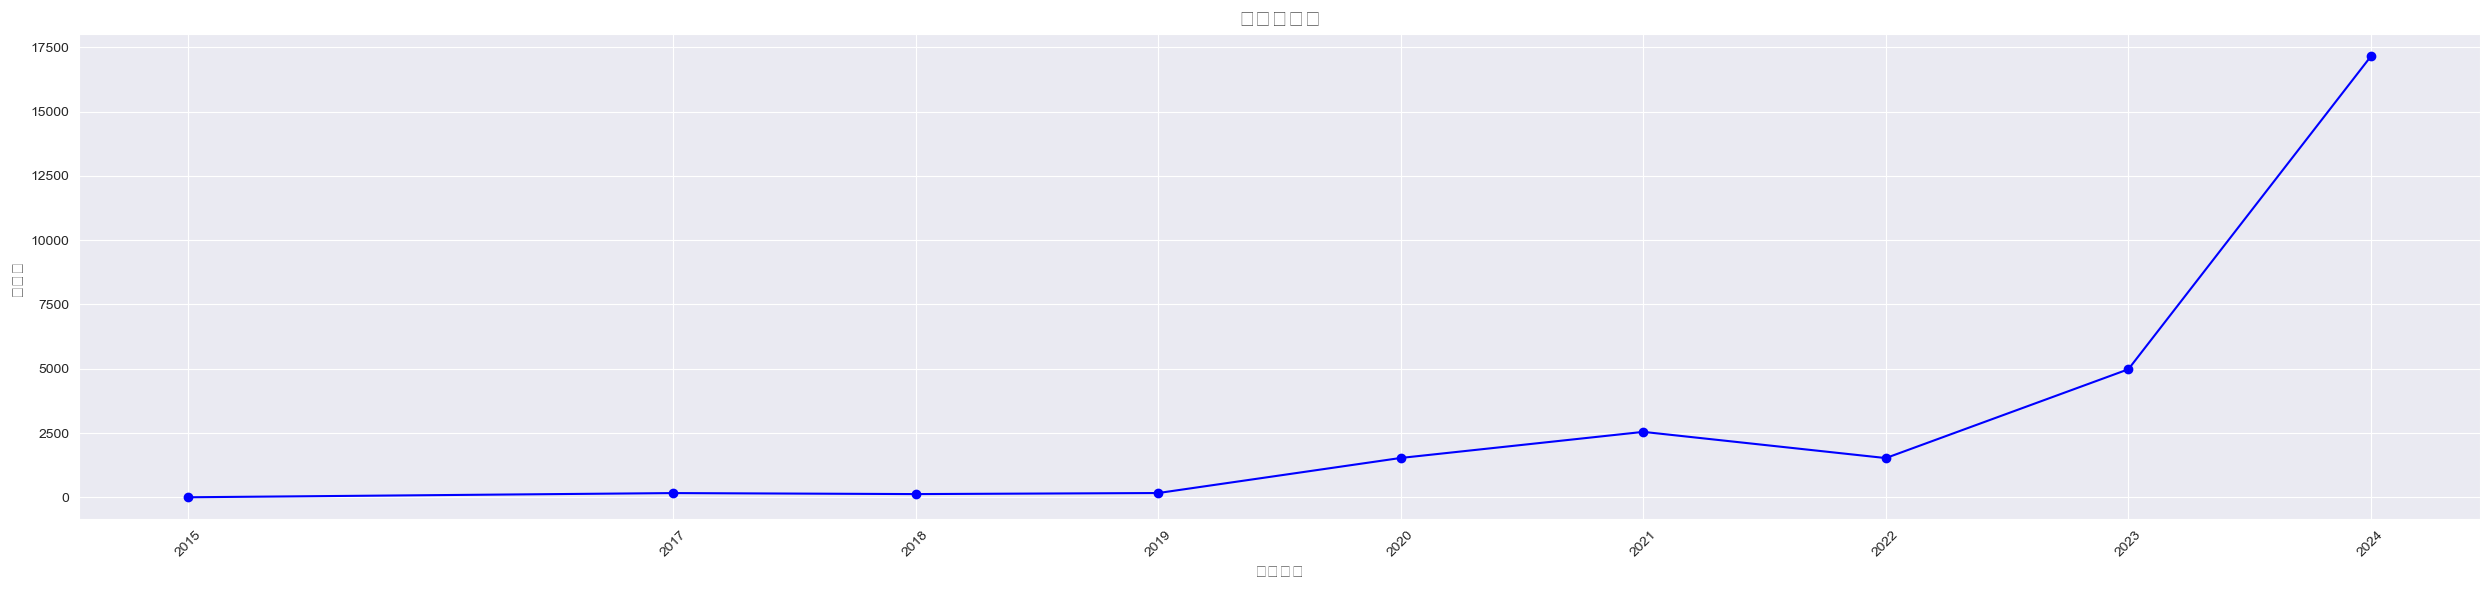

In [22]:
# 假設 df_columns_cleaned 已經包含數據，先將 '交易年月日' 轉換為 datetime 格式
df_columns_cleaned['交易年月日'] = pd.to_datetime(df_columns_cleaned['交易年月日'], errors='coerce')

# 提取年份並新增一個欄位 '交易年份'
df_columns_cleaned['交易年份'] = df_columns_cleaned['交易年月日'].dt.year

# 根據年份來統計每年的交易量
transactions_per_year = df_columns_cleaned.groupby('交易年份').size().reset_index(name='交易量')

# 繪製每年的交易量折線圖
plt.figure(figsize=(25, 6))
plt.plot(transactions_per_year['交易年份'], transactions_per_year['交易量'], marker='o', linestyle='-', color='b')
plt.title('每年交易量', fontsize=16)
plt.xlabel('交易年份', fontsize=12)
plt.ylabel('交易量', fontsize=12)
plt.grid(True)

# 設置X軸標籤並旋轉45度
plt.xticks(transactions_per_year['交易年份'], rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()

In [23]:
# 先將 '交易年月日' 欄位轉換為 datetime 格式
df_columns_cleaned['交易年月日'] = pd.to_datetime(df_columns_cleaned['交易年月日'], errors='coerce')

# 篩選出 2022 年以前的交易
df_before_2022 = df_columns_cleaned[df_columns_cleaned['交易年月日'] < '2012-01-01']

# 查看結果
print(df_before_2022[['交易年月日']])

Empty DataFrame
Columns: [交易年月日]
Index: []


In [24]:
# 先將 '交易年月日' 欄位轉換為 datetime 格式
df_columns_cleaned['交易年月日'] = pd.to_datetime(df_columns_cleaned['交易年月日'], errors='coerce')

# 篩選出 2022 年以前的交易
df_after_2022 = df_columns_cleaned[df_columns_cleaned['交易年月日'] > '2012-01-01']

# 查看結果
print(df_after_2022[['交易年月日']])

           交易年月日
0     2022-03-23
1     2022-03-23
2     2022-03-23
3     2022-03-24
4     2022-03-24
...          ...
28190 2024-02-16
28191 2024-02-16
28192 2024-02-16
28193 2024-02-16
28194 2024-02-16

[28187 rows x 1 columns]


In [25]:
df_columns_cleaned = df_columns_cleaned[df_columns_cleaned['交易年月日'] >= '2012-01-01']

In [26]:
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28187 entries, 0 to 28194
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   鄉鎮市區                  28187 non-null  object        
 1   土地位置建物門牌              28187 non-null  object        
 2   交易年月日                 28187 non-null  datetime64[ns]
 3   建築完成年月                19438 non-null  float64       
 4   建物移轉總面積平方公尺           28187 non-null  float64       
 5   有無管理組織                28187 non-null  object        
 6   總價元                   28187 non-null  int64         
 7   單價元平方公尺               28187 non-null  float64       
 8   備註                    13116 non-null  object        
 9   編號                    28187 non-null  object        
 10  緯度                    28187 non-null  float64       
 11  經度                    28187 non-null  float64       
 12  房地總價元                 28187 non-null  int64         
 13  格局比例_房               

# 屋齡與屋齡區間

In [27]:
# 提取小數點前的部分，去掉前四位，保留從第五位開始的數字作為「建築完成年」
df_columns_cleaned['建築完成年'] = df_columns_cleaned['建築完成年月'].apply(lambda x: str(int(float(x)))[0:-4] if pd.notna(x) and str(x).replace('.0', '').isdigit() else '0')

# 將空字串替換為 '0'
df_columns_cleaned['建築完成年'] = df_columns_cleaned['建築完成年'].replace('', '0')

# 將「建築完成年」轉換成整數類型
df_columns_cleaned['建築完成年'] = df_columns_cleaned['建築完成年'].astype(int)

# 查看結果
print(df_columns_cleaned[['建築完成年月', '建築完成年']].head(10))
print(df_columns_cleaned[['建築完成年']].dtypes)

      建築完成年月  建築完成年
0  1120802.0    112
1  1120705.0    112
2  1130509.0    113
3  1130509.0    113
4  1130509.0    113
5  1121218.0    112
6  1130509.0    113
7  1121108.0    112
8  1121117.0    112
9  1120509.0    112
建築完成年    int64
dtype: object


In [28]:
column_values = sorted(df_columns_cleaned['交易年份'].unique())
# print(column_values)
# 提取年份，並轉換為民國年
df_columns_cleaned['交易年_民國'] = df_columns_cleaned['交易年份']- 1911

# 查看結果
print(df_columns_cleaned[['交易年份', '交易年_民國']].tail(20))

       交易年份  交易年_民國
28175  2024     113
28176  2024     113
28177  2024     113
28178  2024     113
28179  2024     113
28180  2024     113
28181  2024     113
28182  2024     113
28183  2024     113
28184  2024     113
28185  2024     113
28186  2024     113
28187  2024     113
28188  2024     113
28189  2024     113
28190  2024     113
28191  2024     113
28192  2024     113
28193  2024     113
28194  2024     113


In [29]:
df_columns_cleaned['屋齡'] = df_columns_cleaned['交易年_民國'] - df_columns_cleaned['建築完成年']

In [30]:
df_columns_cleaned['屋齡'].unique()

array([ -1,  -2,  46,   1,  12,  26,  43, 113,   5,   0,  15,  28,  25,
         2,  17,  33,  45,  11,  40,   3,  16,   7,  30,  32,   6,  47,
        29,  31,  48,   4,  34,  18,   9,  27,  21,  24,  19,  20,  54,
        44,  23,  51,  10,  39,  13,  35,  49,  42,  50,  14,  41,   8,
        53,  37,  22,  52,  38,  63,  57,  36,  58,  59,  55,  69,  56,
        67, 112,  -3,  60,  71,  65,  92,  61,  90,  68,  62,  87,  64,
        -7,  -6,  -5,  -4,  74,  98,  66,  91,  75, 109,  97,  88,  82,
        85, 102])

In [31]:
# 定義屋齡區間
bins = [-float('inf'), 3, 12, 21, 30, float('inf')]
labels = ['未滿3年', '3年以上－未滿12年', '12年以上－未滿21年', '21年以上－未滿30年', '30年以上']

# 使用 pd.cut() 進行分類並加上標籤
df_columns_cleaned['屋齡區間'] = pd.cut(df_columns_cleaned['屋齡'], bins=bins, labels=labels)

# 檢查結果
print(df_columns_cleaned[['屋齡', '屋齡區間']].head(10))

   屋齡  屋齡區間
0  -1  未滿3年
1  -1  未滿3年
2  -2  未滿3年
3  -2  未滿3年
4  -2  未滿3年
5  -1  未滿3年
6  -2  未滿3年
7  -1  未滿3年
8  -1  未滿3年
9  -1  未滿3年


In [32]:
df_columns_cleaned.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', '房地總價元', '格局比例_房', '格局比例_廳',
       '格局比例_衛', '格局比例_隔間', '是否包含車位', '建築型態清整', '陽台有無', '是否含額外土地',
       'good_count', 'bad_count', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商',
       '工', '農', '建築完成年', '屋齡', '有無電梯', '移轉層次_騎樓', '移轉層次_屋頂', '移轉層次_一二樓',
       '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝', '交易年份', 'KDE_0.5km',
       'KDE_1km', 'KDE_1.5km', 'Region', '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)',
       '交易年_民國', '屋齡區間'],
      dtype='object')

In [33]:
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28187 entries, 0 to 28194
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   鄉鎮市區                  28187 non-null  object        
 1   土地位置建物門牌              28187 non-null  object        
 2   交易年月日                 28187 non-null  datetime64[ns]
 3   建築完成年月                19438 non-null  float64       
 4   建物移轉總面積平方公尺           28187 non-null  float64       
 5   有無管理組織                28187 non-null  object        
 6   總價元                   28187 non-null  int64         
 7   單價元平方公尺               28187 non-null  float64       
 8   備註                    13116 non-null  object        
 9   編號                    28187 non-null  object        
 10  緯度                    28187 non-null  float64       
 11  經度                    28187 non-null  float64       
 12  房地總價元                 28187 non-null  int64         
 13  格局比例_房               

In [34]:
df_columns_cleaned.isna().sum()

鄉鎮市區                        0
土地位置建物門牌                    0
交易年月日                       0
建築完成年月                   8749
建物移轉總面積平方公尺                 0
有無管理組織                      0
總價元                         0
單價元平方公尺                     0
備註                      15071
編號                          0
緯度                          0
經度                          0
房地總價元                       0
格局比例_房                      0
格局比例_廳                      0
格局比例_衛                      0
格局比例_隔間                     0
是否包含車位                      0
建築型態清整                      0
陽台有無                        0
是否含額外土地                     0
good_count                  0
bad_count                   0
good_count_0_500            0
good_count_500_1000         0
good_count_1000_1500        0
bad_count_0_500             0
bad_count_500_1000          0
bad_count_1000_1500         0
建材_磚石                       0
建材_鋼筋                       0
建材_鋼骨                       0
建材_竹木                       0
住         

In [35]:
# 填補數值型特徵的缺失值
numeric_cols_with_na = ['格局比例_衛', '格局比例_廳', '格局比例_房','格局比例_隔間']
for col in numeric_cols_with_na:
    df_columns_cleaned[col].fillna(df_columns_cleaned[col].median(), inplace=True)

In [36]:
df_columns_cleaned.isna().sum()

鄉鎮市區                        0
土地位置建物門牌                    0
交易年月日                       0
建築完成年月                   8749
建物移轉總面積平方公尺                 0
有無管理組織                      0
總價元                         0
單價元平方公尺                     0
備註                      15071
編號                          0
緯度                          0
經度                          0
房地總價元                       0
格局比例_房                      0
格局比例_廳                      0
格局比例_衛                      0
格局比例_隔間                     0
是否包含車位                      0
建築型態清整                      0
陽台有無                        0
是否含額外土地                     0
good_count                  0
bad_count                   0
good_count_0_500            0
good_count_500_1000         0
good_count_1000_1500        0
bad_count_0_500             0
bad_count_500_1000          0
bad_count_1000_1500         0
建材_磚石                       0
建材_鋼筋                       0
建材_鋼骨                       0
建材_竹木                       0
住         

In [37]:
df_kde = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/house1023.csv') 
df_kde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266029 entries, 0 to 266028
Data columns (total 38 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         266029 non-null  object 
 1   土地位置建物門牌     266029 non-null  object 
 2   交易年月日        266029 non-null  object 
 3   建物移轉總面積平方公尺  266029 non-null  float64
 4   有無管理組織       266029 non-null  object 
 5   總價元          266029 non-null  int64  
 6   單價元平方公尺      264417 non-null  float64
 7   編號           266029 non-null  object 
 8   電梯           94011 non-null   object 
 9   緯度           266029 non-null  float64
 10  經度           266029 non-null  float64
 11  bad_count    266029 non-null  float64
 12  good_count   266029 non-null  float64
 13  建築型態清整       266029 non-null  object 
 14  陽台有無         266029 non-null  int64  
 15  是否含額外土地      266029 non-null  int64  
 16  建築型態_住商大樓    266029 non-null  int64  
 17  建築型態_公寓      266029 non-null  int64  
 18  建築型態_其他      266029 non-

In [38]:
# 只選擇需要的欄位進行合併
df_kde_subset = df_kde[['編號', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km']]

# 透過編號欄位進行合併
df_columns_cleaned = df_columns_cleaned.merge(df_kde_subset, on='編號', how='left')


In [39]:
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28187 entries, 0 to 28186
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   鄉鎮市區                  28187 non-null  object        
 1   土地位置建物門牌              28187 non-null  object        
 2   交易年月日                 28187 non-null  datetime64[ns]
 3   建築完成年月                19438 non-null  float64       
 4   建物移轉總面積平方公尺           28187 non-null  float64       
 5   有無管理組織                28187 non-null  object        
 6   總價元                   28187 non-null  int64         
 7   單價元平方公尺               28187 non-null  float64       
 8   備註                    13116 non-null  object        
 9   編號                    28187 non-null  object        
 10  緯度                    28187 non-null  float64       
 11  經度                    28187 non-null  float64       
 12  房地總價元                 28187 non-null  int64         
 13  格局比例_房          

In [40]:
df_columns_cleaned.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_28187row_cleaned_2024.csv',index=False)